In [2]:
# Library imports
import datetime
from matplotlib import pyplot as plt

# Import your module containing the analysis Python functions
# You will need to set your PYTHONPATH to your working directory for this import
from scipy2018 import analyze

In [3]:
# Display matplotlib graphs within Jupyter notebook
%matplotlib inline

In [4]:
# Global variable to full dataset
RAW_DATA = '../data/sf_restaurant_scores_full.csv'

In [5]:
# Use load_data() function to pull dataset into the Jupyter notebook
all_data = analyze.read_file(RAW_DATA)

In [6]:
# Examine dataset columns (keys in the dictionary)
all_data[0].keys()

odict_keys(['business_id', 'business_name', 'business_address', 'business_city', 'business_state', 'business_postal_code', 'business_latitude', 'business_longitude', 'business_location', 'business_phone_number', 'inspection_id', 'inspection_date', 'inspection_score', 'inspection_type', 'violation_id', 'violation_description', 'risk_category'])

In [7]:
# Filter on Routine Inspections only
filtered_data = analyze.filter_inspection_type(all_data, 'Routine - Unscheduled')

In [8]:
len(filtered_data)

38664

In [9]:
# Build custom function to reformat 'inspection_date' into a usable format for our month/day
def reformat_date(inspection_date):
    date_as_string = inspection_date[:10]
    month, day, year = date_as_string.split('/')
    return f'{year}-{month}-{day}'

In [10]:
# Output most recent 'inspection_date' in dataset
max(reformat_date(row['inspection_date']) for row in filtered_data)

'2018-06-28'

In [11]:
# Output oldest 'inspection_date' in dataset
min(reformat_date(row['inspection_date']) for row in filtered_data)

'2015-06-29'

In [12]:
# Split oldest 'inspect_date' back into its individual year, month, day parts
year, month, day = min(reformat_date(row['inspection_date']) for row in filtered_data).split('-')
print(year, month, day)

2015 06 29


In [13]:
# Split most recent 'inspect_date' back into its individual year, month, day parts
year, month, day = max(reformat_date(row['inspection_date']) for row in filtered_data).split('-')
print(year, month, day)

2018 06 28


In [14]:
# Convert data to a datetime date object
start_date = datetime.date(int(year), int(month), int(day))

In [15]:
# Build custom function to iterate through all month/year combinations in the dataset,
# from the oldest month/year to the most recent month/year
# Yields tuples: (month, year)
def generate_month_year(start_month, start_year, end_month, end_year):
    month = start_month
    year = start_year
    
    while True:
        yield month, year
        if month == end_month and year == end_year:
            break
        
        month +=1
        if month > 12:
            month = 1
            year +=1

In [16]:
# Build a list of all month/year combinations in the dataset, and
# a list of the number of violations by risk category, per month/year
dates_of_data = []
aggregated_data = []
for month, year in generate_month_year(6, 2015, 6, 2018):
    all_filtered_data = analyze.filter_month(filtered_data, month, year)
    aggregated_data.append(analyze.count_risk_categories(all_filtered_data))
    dates_of_data.append((datetime.date(year, month, 1)))

In [17]:
# Inspect date data
dates_of_data

[datetime.date(2015, 6, 1),
 datetime.date(2015, 7, 1),
 datetime.date(2015, 8, 1),
 datetime.date(2015, 9, 1),
 datetime.date(2015, 10, 1),
 datetime.date(2015, 11, 1),
 datetime.date(2015, 12, 1),
 datetime.date(2016, 1, 1),
 datetime.date(2016, 2, 1),
 datetime.date(2016, 3, 1),
 datetime.date(2016, 4, 1),
 datetime.date(2016, 5, 1),
 datetime.date(2016, 6, 1),
 datetime.date(2016, 7, 1),
 datetime.date(2016, 8, 1),
 datetime.date(2016, 9, 1),
 datetime.date(2016, 10, 1),
 datetime.date(2016, 11, 1),
 datetime.date(2016, 12, 1),
 datetime.date(2017, 1, 1),
 datetime.date(2017, 2, 1),
 datetime.date(2017, 3, 1),
 datetime.date(2017, 4, 1),
 datetime.date(2017, 5, 1),
 datetime.date(2017, 6, 1),
 datetime.date(2017, 7, 1),
 datetime.date(2017, 8, 1),
 datetime.date(2017, 9, 1),
 datetime.date(2017, 10, 1),
 datetime.date(2017, 11, 1),
 datetime.date(2017, 12, 1),
 datetime.date(2018, 1, 1),
 datetime.date(2018, 2, 1),
 datetime.date(2018, 3, 1),
 datetime.date(2018, 4, 1),
 datetime.d

In [18]:
# Inspect violations data
aggregated_data

[Counter({'Moderate Risk': 18,
          'Low Risk': 28,
          'High Risk': 9,
          'No Violations': 2}),
 Counter({'Low Risk': 269,
          'High Risk': 76,
          'Moderate Risk': 194,
          'No Violations': 40}),
 Counter({'Moderate Risk': 219,
          'Low Risk': 293,
          'High Risk': 106,
          'No Violations': 49}),
 Counter({'Moderate Risk': 194,
          'Low Risk': 272,
          'High Risk': 110,
          'No Violations': 69}),
 Counter({'Moderate Risk': 210,
          'Low Risk': 281,
          'High Risk': 87,
          'No Violations': 44}),
 Counter({'Low Risk': 209,
          'Moderate Risk': 124,
          'High Risk': 47,
          'No Violations': 38}),
 Counter({'Low Risk': 176,
          'High Risk': 44,
          'Moderate Risk': 122,
          'No Violations': 35}),
 Counter({'Low Risk': 248,
          'Moderate Risk': 145,
          'High Risk': 53,
          'No Violations': 29}),
 Counter({'Low Risk': 454,
          'High Risk': 

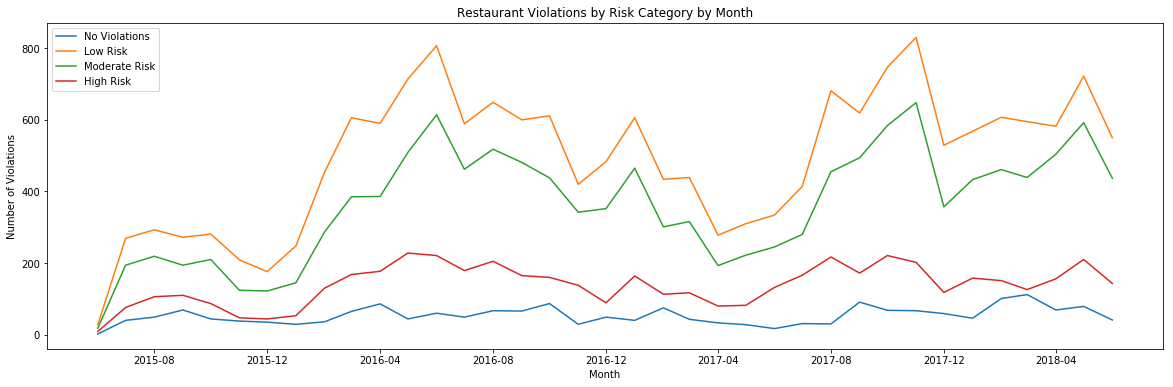

In [19]:
# Plot data using matplotlib
# X axis: year/month
# Y axis: number of violations; one line per risk category
# Adds labels, a title, and a legend
fig, ax = plt.subplots(figsize=(20, 6))
ax.set_xlabel('Month')
ax.set_ylabel('Number of Violations')
ax.set_title('Restaurant Violations by Risk Category by Month')
ax.plot(dates_of_data, [row['No Violations'] for row in aggregated_data], label='No Violations')
ax.plot(dates_of_data, [row['Low Risk'] for row in aggregated_data], label = 'Low Risk')
ax.plot(dates_of_data, [row['Moderate Risk'] for row in aggregated_data], label = 'Moderate Risk')
ax.plot(dates_of_data, [row['High Risk'] for row in aggregated_data], label = 'High Risk')
ax.legend()